<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 1

## Desarrollo de una herramienta analítica usando solo Python

Este laboratorio busca evaluar las habilidades relacionadas con la primera parte del curso, correspondiente a las primeras tres semanas. Este enunciado estará disponible desde la semana 2 y deberá entregarse al final de la semana 4 en el enlace correspondiente. Su desarrollo corresponde al 30% de la calificación total del curso.

Esta actividad responde directamente al segundo objetivo del curso:
* Implementar una herramienta analítica que permita responder una pregunta de negocio para un problema sencillo de analítica de datos, utilizando únicamente algorítmica básica en Python.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para: 
1. Leer datos desde archivos.
2. Almacenar datos en  estructuras de Python.
3. Crear y llamar funciones correctamente.
4. Implementar condicionales diferenciando *if*, *elif* y *else*
5. Implementar ciclos diferenciando el propósito de *for* y *while*
6. Importar paquetes y utilizar sus funciones.

**NOTAS:**
- Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él desde el comienzo.


## Contexto: exploración del potencial para asignar becas Uniandes
La Universidad de los Andes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Quiero Estudiar, o Ser Pilo Paga, entre otros, han sido revolucionarios, al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades privadas más importantes del país.

Actualmente, la Universidad quiere evaluar el potencial impacto que tendrían algunos programas de *acción afirmativa* para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas. Se cuenta con información respecto a la edad, género, estado civil, estrato socio-económico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas que han respondido encuestas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar la población que sería beneficiaria de las becas. Puntualmente, se espera que, dadas unas reglas de selección (ej.: pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca información sobre la población potencialmente beneficiada, de forma que exista un sustento al momento de definir las reglas de selección.

## 1. Obtención e inspección de archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo, y por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano. Cada archivo corresponde a una de las variables antes mencionadas y se puede garantizar que todos relacionan a las personas encuestadas en el mismo orden (i.e., la primera línea de todos los archivos corresponde a datos de la primera persona encuestada, la segunda línea a la segunda persona, etc.).

Los archivos con los que se cuenta son:
* *edades.txt*: un archivo ordenado con las edades de cada persona de la población encuestada 
* *género.txt*: un archivo ordenado con el género de cada persona de la población encuestada 
* *estado_civil.txt*: un archivo ordenado con el estado civil de cada persona de la población encuestada 
* *escolaridad.txt*: un archivo ordenado con el nivel de escolaridad de cada persona de la población encuestada 
* *estrato.txt*: un archivo ordenado con el estrato socio-económico de cada persona de la población encuestada
* *region.txt*: un archivo ordenado con la región de proveniencia de cada persona de la población encuestada

**Misión 1**

Poner en variables de Python la información que está en los archivos listados arriba.

* *Versión base*: escribe línea a línea el código necesario para poner en variables de Python la información de cada uno de los archivos.

* *Milla extra*: escribe una función que sea capaz de hacer lo anterior para un archivo y úsala en un ciclo para automatizar la lectura de los diferentes archivos.

In [451]:
# código
# YOUR CODE HERE



#raise NotImplementedError()


archivos =["edad.txt","genero.txt","estado_civil.txt","escolaridad.txt","estrato.txt","region.txt","promedio.txt"]
informacion =[]

for i in range(len(archivos)):
    lista_temporal = []
    archivo = open("Archivos/" + archivos[i], encoding = "utf-8-sig")
    archivo = archivo.read()
    value = archivo.splitlines()
    
    if isinstance(value[0],str):
            if value[0].isalpha():
                informacion.append(value)
            else:
                for j in range(len(value)):
                    numero = float(value[j])
                    lista_temporal.append(numero)
            
                informacion.append(lista_temporal)



**Misión 2**

Reportar las principales características en los datos.
* *Versión base*: utilizar métricas básicas como conteos o promedios por categorías en los datos.
* *Milla extra*: utilizar visualizaciones simples como diagramas de barras, de pastel u otros.

In [452]:
import matplotlib.pyplot as plt

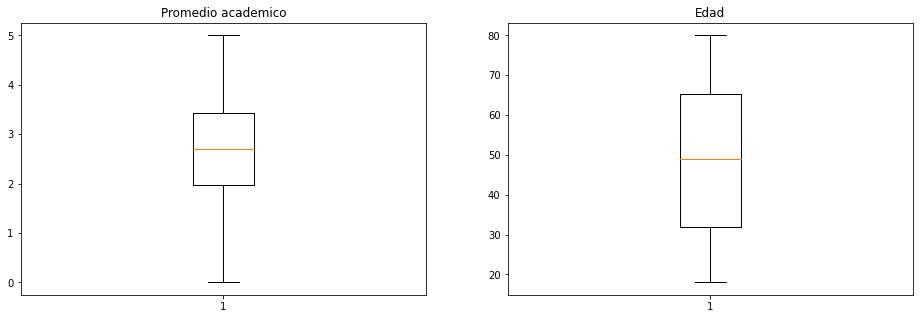

In [453]:
#Analisis general de la base
#promedio y edad

# plt.subplots example

# Create subplots
def graficos_box(informacion):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize =(16,5))
    ax[0].boxplot(informacion[6])
    ax[1].boxplot(informacion[0])
    ax[0].set_title("Promedio academico")
    ax[1].set_title("Edad")
    
    
    return plt.show()

graficos_box(informacion)

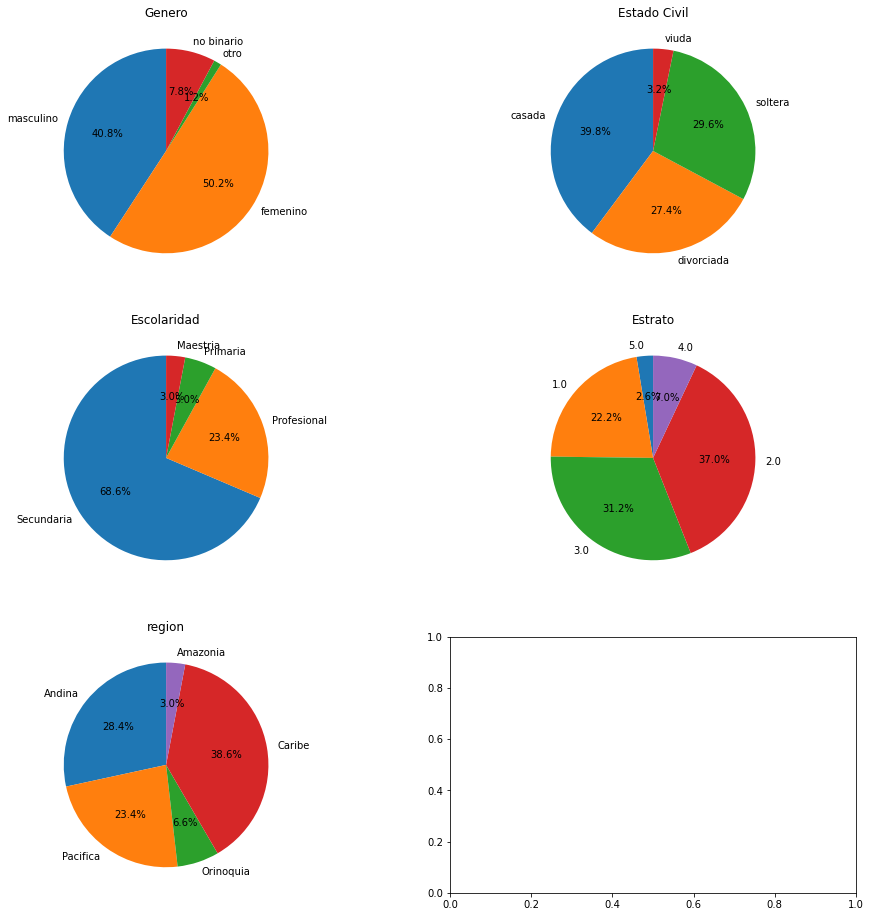

In [454]:

#¿como es la composicion de la  base en terminos de las variables categoricas?
def graficos_pie(informacion):
    variables_categoricas  = ["Genero","Estado Civil","Escolaridad","Estrato","region"]
    medias_calculadas = []


    for i in range(len(variables_categoricas)):
        lista_variable = []
        for j in range(len(informacion[i+1])):
            if informacion[i+1][j] not in lista_variable:
                lista_variable.append(informacion[i+1][j])
        lista_medidas = {}
        for h in range(len(lista_variable)):
            medida = informacion[i+1].count(lista_variable[h])
            lista_medidas[lista_variable[h]] = medida

        medias_calculadas.append(lista_medidas)

    fig, ax = plt.subplots(3, 2, sharey=False, figsize =(16,16))

    ax[0,0].pie(medias_calculadas[0].values() ,labels= medias_calculadas[0].keys(), autopct='%1.1f%%', startangle=90)
    ax[0,1].pie(medias_calculadas[1].values() ,labels= medias_calculadas[1].keys(), autopct='%1.1f%%', startangle=90)
    ax[1,0].pie(medias_calculadas[2].values() ,labels= medias_calculadas[2].keys(), autopct='%1.1f%%', startangle=90)
    ax[1,1].pie(medias_calculadas[3].values() ,labels= medias_calculadas[3].keys(), autopct='%1.1f%%', startangle=90)
    ax[2,0].pie(medias_calculadas[4].values() ,labels= medias_calculadas[4].keys(), autopct='%1.1f%%', startangle=90)

    ax[0,0].set_title("Genero")
    ax[0,1].set_title("Estado Civil")
    ax[1,0].set_title("Escolaridad")
    ax[1,1].set_title("Estrato")
    ax[2,0].set_title("region")
     
    return plt.show()

graficos_pie(informacion)

## 2. Abordaje de la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que el criterio principal de selección debería ser respecto a lo económico y académico, sin importar otras características personales, mientras que otros piensan que considerar estas características es, de hecho, parte del espíritu del programa.

* El primer grupo sugiere que se deben tomar en orden ascendente los estratos y elegir, en cada uno de ellos, al 2% de personas con promedio académico superior en esa sub-población, hasta que se agoten las becas disponibles. En caso de quedar becas disponibles al final del proceso, se repite el mismo esquema, considerando que ya no se tienen en cuenta las personas que hayan sido elegidas en rondas anteriores.

* El segundo grupo sugiere que los recibidores de becas deben estar igualmente distribuidos entre las diferentes regiones y generos, considerando, por supuesto, que para cada una de esas sub-poblaciones, las personas elegidas sean las de mejores promedios académicos.

Dado que las diferencias entre estos grupos obedecen a su entendimiento particular del problema, el presidente del comité propone utilizar los datos disponibles de las encuestas, sugiriendo que se analice qué características tendría la población de elegidos bajo cada uno de los dos criterios expuestos.

**Misión 3**

Defina la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [455]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

pregunta_negocio = '¿Cuales son las personas merecedoras de la beca y bajo que criterio?'

pregunta_analytics = '¿Como calcular, para cada una de los metodos planteados, el algoritmo correcto para seleccionar las posibles personas merecedoras de beca?'

**Misión 4**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *primer grupo* mencionado arriba.

In [456]:
lista = informacion

In [457]:
#Voy a insertar la cantidad de becas que tiene la facultad
cantidad_becas = 28

In [458]:
#voy a importar las liberias que necesito
import math

#voy a definir la llave correcta para cada uno (con el indice o posicion en donde se encuentra en la lista)
lista_con_indice =[]

for i in range(len(lista)):
    lista_sub_temporal = []
    for j in range(len(lista[i])):
        valor = j
        lista_sub_temporal.append((j,lista[i][j]))
    lista_con_indice.append(lista_sub_temporal)
    
#voy  a generar una lista de estratos pora saber cuales son los estratos en la base que nos adjuntan
#voy a realizar una funcion en caso de necesitarla en las proximas misiones o dentro del mismo desarrollo
columna=4

def lista_columna_funcion(columna):
    lista_columna = []
    for i in range(len(lista[columna])):
        if lista[columna][i] not in lista_columna:
            lista_columna.append(lista[columna][i])
    lista_columna.sort()
    return lista_columna   

estratos = lista_columna_funcion(columna)

#Voy a generar diccionarios y listas vacios que necesitaré posteriormente

indices ={}
indices_promedio ={}
conteo = {}
elegidos ={}
elegidos_final =[]


#Realizamos un diccionario, llamado "indices", para ver cuales son las filas que contienen cada estrato
#voy a realizar una funcion en caso de necesitarla en las proximas misiones o dentro del mismo desarrollo

#Hay que hacer la lisa de indices 
def indices_funcion(lista_columna,columna,indices):
    for i in range(len(lista_columna)):
        lista_temporal_indices = []
        for j in range(len(lista[columna])):
            #print(str(lista[columna][j]))
            if lista[columna][j] == lista_columna[i]:
                lista_temporal_indices.append(j)
                
        indices[lista_columna[i]] = lista_temporal_indices
    return indices

indices = indices_funcion(estratos,columna,indices)

#Con el diccionario que tenemos de "indices", y el diccionario "lista_con_indice" creamos un diccionario llamado "indices_promedio" con el estudiante y el 
#promedio academico que tiene, ordenado de forma descendente 
#voy a realizar una funcion en caso de necesitarla en las proximas misiones o dentro del mismo desarrollo
def lista_promedio_funcion(lista_columna,indices,lista_con_indice,indices_promedio):
    for i in range(len(lista_columna)):
        lista_estrato = indices[lista_columna[i]]
        lista_promedio_temporal = []

        for j in range(len(lista_con_indice[6])):
            if j  in lista_estrato:
                lista_promedio_temporal.append(lista_con_indice[6][j])
                
        indices_promedio[lista_columna[i]] = sorted(lista_promedio_temporal, key=lambda estudiante: estudiante[1], reverse=True)       
    
    return indices_promedio

indices_promedio = lista_promedio_funcion(estratos,indices,lista_con_indice,indices_promedio)

#Realizamos un diccionario con el dato de cual seria(en cantidad) el 2% de los estudiantes a aceptar en la beca
def cant_estudiantes(indices_promedio,lista_columna):
    
    conteo ={}
    for i in range(len(lista_columna)):
        key = lista_columna[i]
        lista_conteo = indices_promedio[lista_columna[i]]
        contar = len(lista_conteo)
        dos_porciento = math.floor(contar*2/100)

        conteo[lista_columna[i]] = dos_porciento
    return conteo

conteo = cant_estudiantes(indices_promedio,estratos)

#Realizamos un diccionario con los estudiantes elegidos por estrato

def elegir_porcentaje_estudiantes(lista_columna,indices_promedio,conteo):
    elegidos={}
    for i in range(len(lista_columna)):
        cant_datos = conteo[lista_columna[i]]
        lista_elegidos_temporal = indices_promedio[lista_columna[i]][:cant_datos]
        elegidos[lista_columna[i]] = lista_elegidos_temporal
    return elegidos

elegidos = elegir_porcentaje_estudiantes(estratos,indices_promedio,conteo)

#Generamos la lista final, segun la cantidad de estudiantes por beca para validar cuales serían los estudiantes admitidos
#vamos a validar la cantidad de becados propuestos en el diccionario de elegidos
cantidad_de_becados_propuestos=0
for i in range(len(estratos)):
    cantidad_de_becados_propuestos = cantidad_de_becados_propuestos +len(elegidos[estratos[i]])
    

def llenar_lista_de_elegidos_final(cantidad_de_becados_propuestos,estratos,elegidos,elegidos_final):

    n = 0
    primer_corrida = 0
    while n < 1:

        if len(elegidos_final)<cantidad_becas and len(elegidos_final)<cantidad_de_becados_propuestos:
            if primer_corrida  == 0:
                i = 0
                j = 0
                primer_corrida=1
            region_genero = estratos[i] 
            largo = len(elegidos[region_genero])
            estudiante = elegidos[region_genero][j]
            elegidos_final.append(estudiante)
            if j+1 < len(elegidos[region_genero]):
                j = j + 1
            else:
                i = i + 1
                j=0
        else:
            n=3
    return elegidos_final

elegidos_final = llenar_lista_de_elegidos_final(cantidad_de_becados_propuestos,estratos,elegidos,elegidos_final)

#En caso de que sobren campos, lo que debor hacer es realizar nuevamente la funcion conteo y la funcion de elegir a los mejores estudiantes
#posteriormente lo que se debe hacer es realizar nuevamente la funcion de elegidos
#esto lo hare en u bucle hasta que se completen la cantidad de becas ofrecidas

#realizar este proceso mientras que se completen las becas:
validadorbecascompletas = 0



while validadorbecascompletas == 0:
    
    #Realizamos la validacion de que se completen todos los campos
    if len(elegidos_final) < cantidad_becas:
        #modificamos el diccionario indices promedio
        for i in range(len(estratos)):
            estrato = estratos[i]
            lista_estrato = indices_promedio[estrato]
            lista_filtrada_estrato = list(set(lista_estrato).difference(set(elegidos_final)))
            indices_promedio[estrato] = lista_filtrada_estrato
        #realizamos la funcion conteo
        conteo = cant_estudiantes(indices_promedio,estratos)
        #volvemos a elegir a los mejores candidatos
        elegidos = elegir_porcentaje_estudiantes(estratos,indices_promedio,conteo)

        for i in range(len(estratos)):
            cantidad_de_becados_propuestos = cantidad_de_becados_propuestos +len(elegidos[estratos[i]])

        #Volvemos a cargar elegidos_final:
        elegidos_final= llenar_lista_de_elegidos_final(cantidad_de_becados_propuestos,estratos,elegidos,elegidos_final)

    else:
        validadorbecascompletas = 2



lista_temporal_final = []
for i in range(len(elegidos_final)):
    estudiante = elegidos_final[i][0]
    lista_temporal_final.append(estudiante)
#Los elegidos a las becas son
elegidos_final=lista_temporal_final

print("Los estudiantes a elegir son: " + str(elegidos_final))

Los estudiantes a elegir son: [376, 162, 243, 7, 207, 60, 471, 109, 363, 421, 308, 449, 170, 375, 90, 88, 283, 289, 200, 238, 303, 42, 228, 402, 244, 359, 338, 380]


**Misión 5**

Desarrollar un algoritmo que permita conocer la población que sería becada según los criterios propuestos por el *segundo grupo* mencionado arriba.

In [459]:
#En este ejercicio, todos los grupos van a estar representados a un 3%

In [460]:
lista = informacion

In [461]:
#Aqui puedes elegir la representacion
representacion = 1 #esta medida se da en porcentaje (en este caso es 1%)

In [462]:
#Voy a concatenar los  la region y el genero, de esta forma poder realizae la llave, y la agrego a "lista"
region_genero =[]
for i in range(len(lista[5])):
    region = lista[5][i]
    genero = lista[1][i]
    tupla  = (region, genero)
    region_genero.append(tupla)

#Voy a añadir esta lista  a la lista general
lista.append(region_genero)

In [463]:
#voy a importar las liberias que necesito
import math

#voy a definir la llave correcta para cada uno (con el indice o posicion en donde se encuentra en la lista)
lista_con_indice =[]

for i in range(len(lista)):
    lista_sub_temporal = []
    for j in range(len(lista[i])):
        valor = j
        lista_sub_temporal.append((j,lista[i][j]))
    lista_con_indice.append(lista_sub_temporal)
    
#voy  a generar una lista de rg pora saber cuales son los rg en la base que nos adjuntan

columna=7
rg = lista_columna_funcion(columna)

#Voy a generar diccionarios y listas vacios que necesitaré posteriormente

indices_rg ={}
indices_promedio_rg ={}
conteo_rg = {}
elegidos_rg ={}
elegidos_final_rg =[]

#Realizamos un diccionario, llamado "indices", para ver cuales son las filas que contienen cada rg

indices_rg = indices_funcion(rg,columna,indices_rg)

#Con el diccionario que tenemos de "indices", y el diccionario "lista_con_indice" creamos un diccionario llamado "indices_promedio" con el estudiante y el 
#promedio academico que tiene, ordenado de forma descendente 

indices_promedio_rg = lista_promedio_funcion(rg,indices_rg,lista_con_indice,indices_promedio_rg)


#Realizamos un diccionario con el dato de cual seria(en cantidad) el 3%(o la representacion) de los estudiantes a aceptar en la beca
def cant_estudiantes_rg(indices_promedio_rg,rg,representacion):
    
    conteo_rg ={}
    for i in range(len(rg)):
        key = rg[i]
        lista_conteo = indices_promedio_rg[rg[i]]
        contar = len(lista_conteo)
        
        rep_cant_est = math.ceil(contar*representacion/100)
        conteo_rg[rg[i]] = rep_cant_est

    return conteo_rg

conteo_rg = cant_estudiantes_rg(indices_promedio_rg,rg,representacion)

#Realizamos un diccionario con los estudiantes elegidos por rg
elegidos_rg = elegir_porcentaje_estudiantes(rg,indices_promedio_rg,conteo_rg)


#Hacemos la lista final:
for i in range(len(rg)):
    
    region_genero = rg[i]
    lista_temporal = elegidos_rg[region_genero]
    for j in range(len(lista_temporal)):
        elegidos_final_rg.append(lista_temporal[j])
        
#Hacemos la lista d elos estudiante
lista_temporal_final_rg = []
for i in range(len(elegidos_final_rg)):
    estudiante = elegidos_final_rg[i][0]
    lista_temporal_final_rg.append(estudiante)

elegidos_final_rg = lista_temporal_final_rg 
lista.pop(7) 
print("Los estudiantes a elegir son: " + str(elegidos_final_rg))


Los estudiantes a elegir son: [478, 49, 375, 195, 7, 162, 259, 373, 243, 60, 491, 22, 136, 113, 422, 4, 363, 376, 361]


**Misión 6**

Desarrollar un algoritmo, a partir de lo anterior, cuyo resultado permita al comité comparar fácilmente las características de las dos poblaciones hipotéticas que recibirían becas.

*Ayuda*: considera utilizar tus implementaciones de la *Misión 2* para facilitar esta misión.

In [464]:
informacion_estratos =[]
for i in range(len(lista)):
    lista_variable = []
    for j in range(len(lista[i])):
        if j in elegidos_final:
            lista_variable.append(lista[i][j])
    informacion_estratos.append(lista_variable)

In [465]:
informacion_rg =[]
for i in range(len(lista)):
    lista_variable = []
    for j in range(len(lista[i])):
        if j in elegidos_final_rg:
            lista_variable.append(lista[i][j])
    informacion_rg.append(lista_variable)


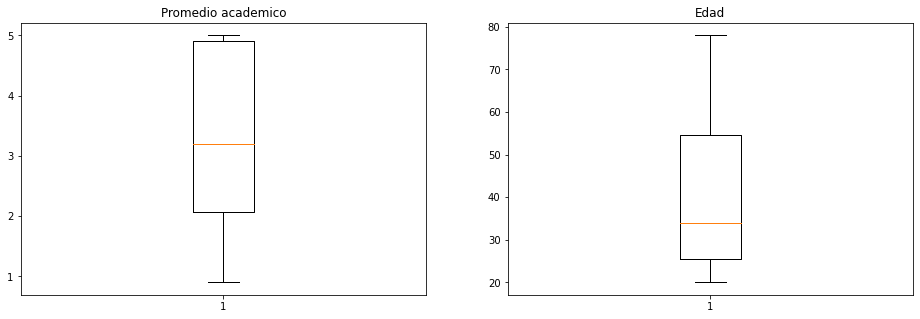

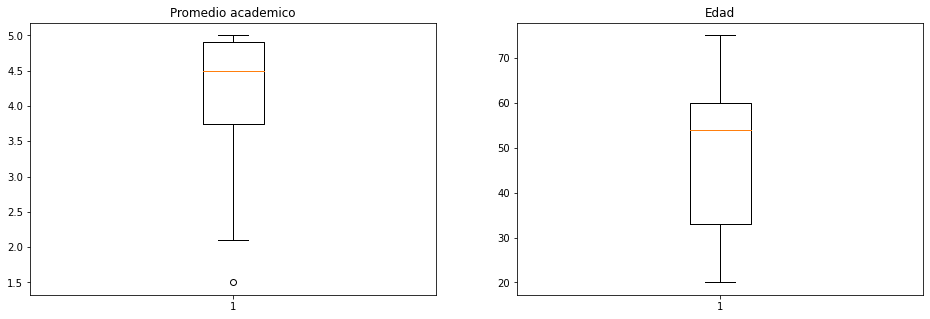

In [466]:
#Primer base:
graficos_box(informacion_estratos)
#seunda opcion:
graficos_box(informacion_rg)

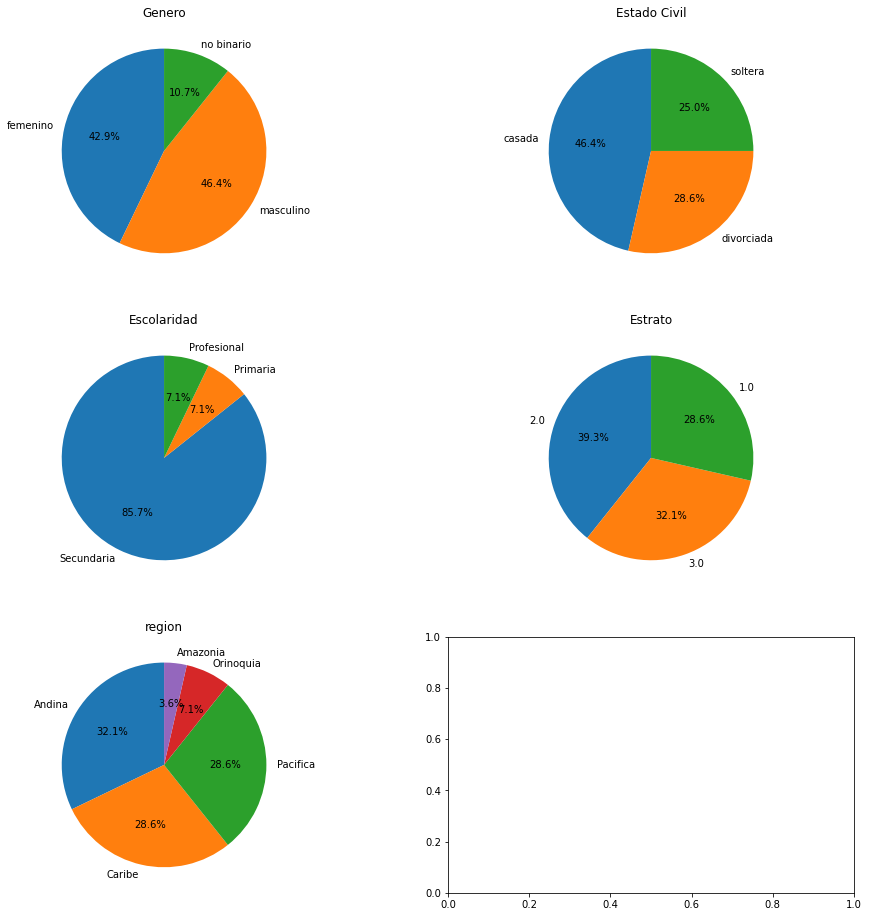

In [467]:
#Primera opcion:
graficos_pie(informacion_estratos)


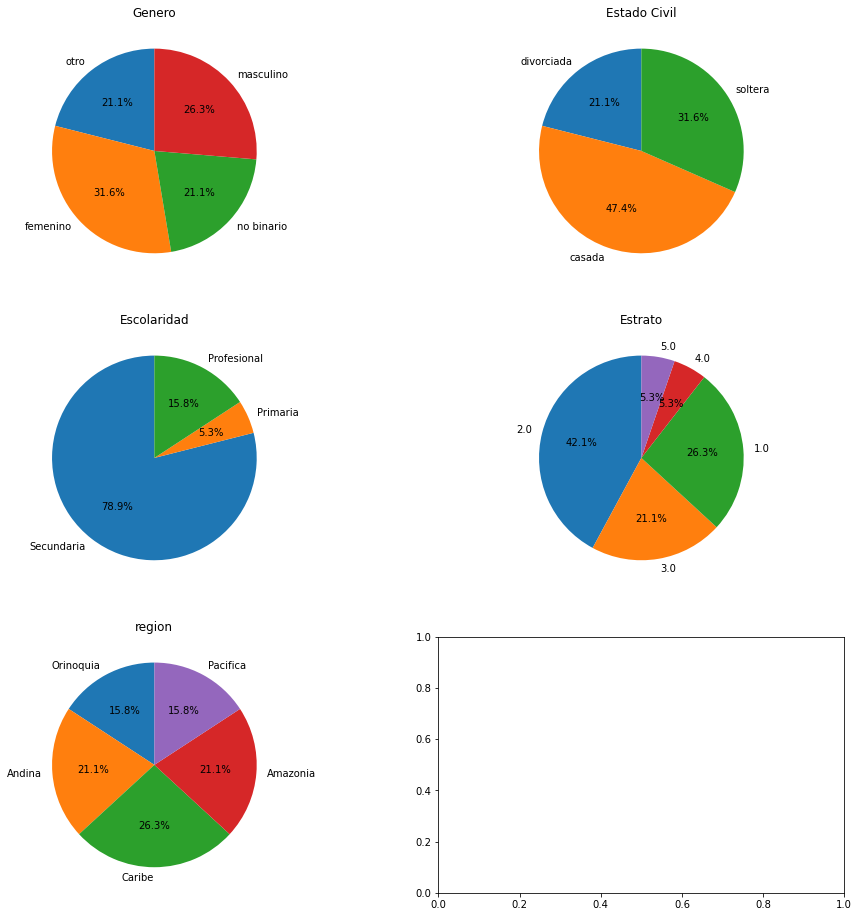

In [468]:
#Segunda opcion:
graficos_pie(informacion_rg)


## 3. Desarrollo de una solución analítica

Reconociendo la complejidad de este problema (que no permite reducirlo a una dicotomía) y viendo el potencial del análisis de datos para enriquecer la discusión y los insumos para tomar decisiones, el comité ha solicitado una herramienta analítica que les permita . Sus requerimientos son:

* La herramienta debe permitir ingresar una política de selección de becados.
    * Se debe poder elegir el rango de edad de los aspirantes.
    * Se debe poder elegir qué proporción de las becas se asigna a cada género, a cada estrato, o a cada región (pero sólo debe elegirse uno de estos criterios).
* La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente elegida si se usara la política ingresada.

**Misión 7**

Desarrollar, a partir de lo construido hasta el momento, un algoritmo que permita cumplir con los requerimientos del comité.

In [661]:
lista = informacion

In [662]:
#Rango de edad:
#por favor escriba la edad mminima y maxima de los apirantes (el analisis incluirá esta edad)
edad_mimina = 18
edad_maxima = 35

In [663]:
#Criterio de seleccion:
#caracteristica = "Genero"
caracteristica = "Estrato"
#caracteristica = "Region"

In [664]:
#En caso de que sea genero, escriba aqui el criterio(en cantidad de becas)

In [665]:
masculino = 0
femenino = 5
no_binario = 1
otro = 3



In [666]:
#En caso de que sea estrato, escriba aqui el criterio(en cantidad de becas)

In [677]:
estrato_1 = 5
estrato_2 = 4
estrato_3 = 3
estrato_4 = 0
estrato_5 = 0

In [678]:
#En caso de que sea region, escriba aqui el criterio(en cantidad de becas)

In [679]:
Amazonia = 1
Andina=3
Caribe=4
Orinoquia =1
Pacifica =3

In [680]:
#Creamos la lista de los aspirantes que NO entran en la politica (EN LA EDAD)
aspirantes_excluir =[]
for i in range(len(lista[0])):
    if lista[0][i] < edad_mimina or lista[0][i]>edad_maxima:
        aspirantes_excluir.append((i,lista[6][i]))


In [681]:
#Definimos la columna que se va a analizar en la lista que se creó al principio
if caracteristica ==  "Genero":
    columna = 1
elif caracteristica == "Estrato":
    columna = 4
elif caracteristica == "Region":
    columna =5
else:
    print("por favor elija una opcion valida")

In [718]:
#voy a importar las liberias que necesito
import math

#voy a definir la llave correcta para cada uno (con el indice o posicion en donde se encuentra en la lista)
lista_con_indice =[]

for i in range(len(lista)):
    lista_sub_temporal = []
    for j in range(len(lista[i])):
        valor = j
        lista_sub_temporal.append((j,lista[i][j]))
    lista_con_indice.append(lista_sub_temporal)

#voy  a generar una lista de rg pora saber cuales son las variables  en la base que nos adjuntan
variable = lista_columna_funcion(columna)

#Voy a generar diccionarios y listas vacios que necesitaré posteriormente

indices_vb ={}
indices_promedio_vb ={}
conteo_vb = {}
elegidos_vb ={}
elegidos_final_vb =[]

#Realizamos un diccionario, llamado "indices", para ver cuales son las filas que contienen cada variable
indices_vb = indices_funcion(variable,columna,indices_vb)

#Con el diccionario que tenemos de "indices", y el diccionario "lista_con_indice" creamos un diccionario llamado "indices_promedio" con el estudiante y el 
#promedio academico que tiene, ordenado de forma descendente 

indices_promedio_vb = lista_promedio_funcion(variable,indices_vb,lista_con_indice,indices_promedio_vb)

#modificamos este diccionario anterior para excluir aquellas personas que no entran en el criterio de seleccion:

for i in range(len(variable)):
    
    variable_analizada = variable[i]
    lista_variable = indices_promedio_vb[variable_analizada]
    lista_filtrada_variable = list(set(lista_variable).difference(set(aspirantes_excluir)))
    
    indices_promedio_vb[variable_analizada] = lista_filtrada_variable


#Realizamos un diccionario con el dato de cual seria(en cantidad) el 3%(o la representacion) de los estudiantes a aceptar en la beca
if columna == 1:
    conteo_vb = {"masculino":masculino, "femenino":femenino,"no binario":no_binario,"otro":otro }
elif columna == 4:
    conteo_vb = {1:estrato_1,2:estrato_2,3 :estrato_3,4 : estrato_4, 5: estrato_5 }
else:
    conteo_vb = {"Amazonia":Amazonia, "Andina":Andina,"Caribe":Caribe,"Orinoquia":Orinoquia,"Pacifica":Pacifica} 
    
#Realizamos un diccionario con los estudiantes elegidos por variable
for i in range(len(indices_promedio_vb)):
    variable_analizar = variable[i]
    lista_promedio_temporal = indices_promedio_vb[variable_analizar]
    indices_promedio_vb[variable_analizar] = sorted(lista_promedio_temporal, key=lambda estudiante: estudiante[1], reverse=True)
    
elegidos_vb = elegir_porcentaje_estudiantes(variable,indices_promedio_vb,conteo_vb)
#Hacemos la lista final:
for i in range(len(variable)):
    
    variables = variable[i]
    lista_temporal = elegidos_vb[variables]
    for j in range(len(lista_temporal)):
        elegidos_final_vb.append(lista_temporal[j])
#Hacemos la lista d elos estudiante
lista_temporal_final_vb = []
for i in range(len(elegidos_final_vb)):
    estudiante = elegidos_final_vb[i][0]
    lista_temporal_final_vb.append(estudiante)
    
#Los elegidos a las becas son
elegidos_final_vb = lista_temporal_final_vb


print("Los estudiantes a elegir son: " + str(elegidos_final_vb))
print("Nota: si en el rango de edad seleccionado existen menos apirantes que los seleccionados, se va a elegir la totalidad de aspirates en la categoria")


Los estudiantes a elegir son: [363, 283, 287, 213, 250, 207, 478, 308, 222, 471, 49, 161]
Nota: si en el rango de edad seleccionado existen menos apirantes que los seleccionados, se va a elegir la totalidad de aspirates en la categoria


In [719]:
#La herramienta debe generar un resultado que permita al comité analizar las características de la población potencialmente 
#elegida si se usara la política ingresada.

In [720]:
informacion_vb =[]
for i in range(len(lista)):
    lista_variable = []
    for j in range(len(lista[i])):
        if j in elegidos_final_vb:
            lista_variable.append(lista[i][j])
    informacion_vb.append(lista_variable)


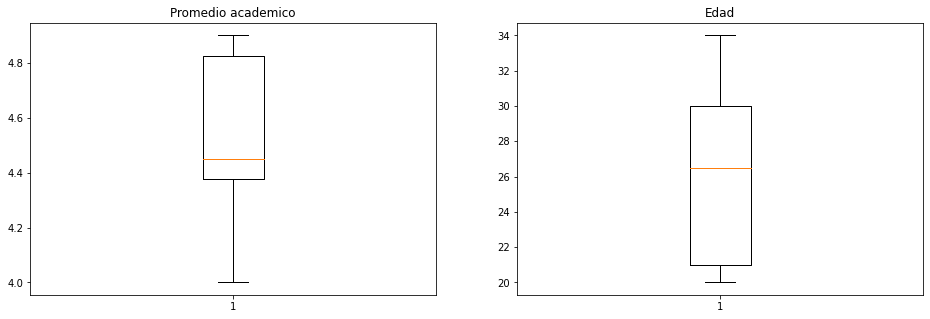

In [721]:
graficos_box(informacion_vb)

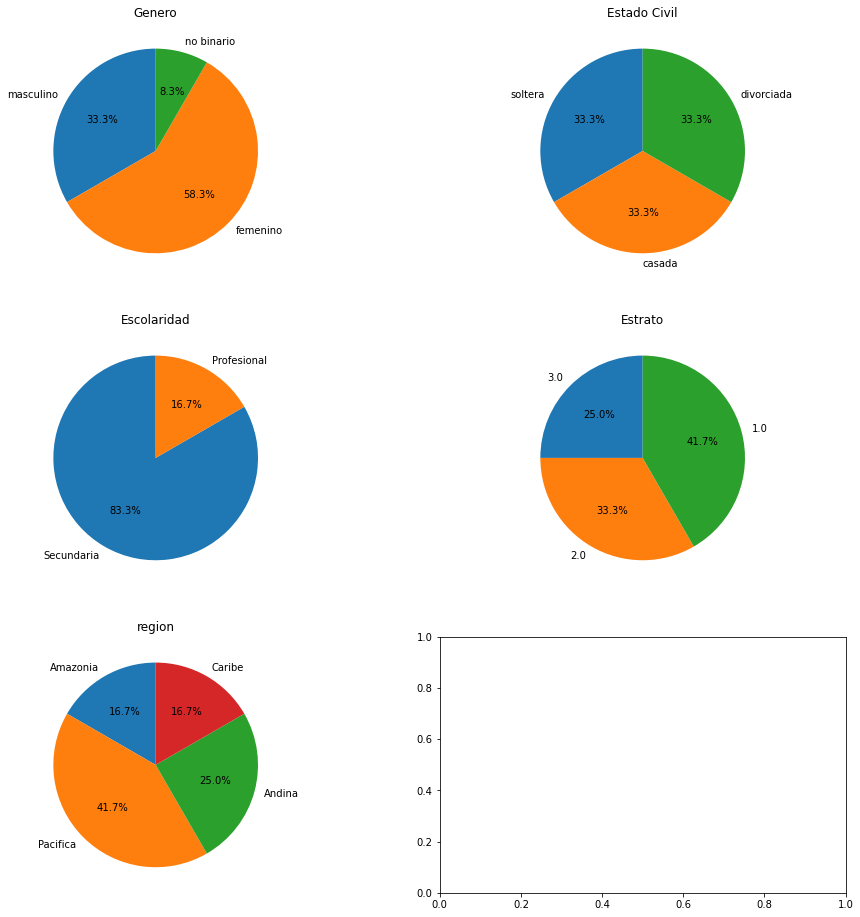

In [722]:

graficos_pie(informacion_vb)


**Misión 8**

Proponer, con base en tu propio uso de la herramienta, una política de ingreso que consideres apropiada dado el contexto proporcionado. Si lo crees adecuado, explica, máximo 500 caracteres, las virtudes de tu propuesta (esto puede estar soportado en los datos, o no).

In [688]:
# respuesta en texto (solo leeremos los primeros 300 caracteres de la respuesta)

respuesta = 'Mi propuesta al comite, es manejar una politica inclusiva que en dodonde aquelllas personas de menores recursos  \
economicos(estrados bajos) tengan la oportunidad de tener acceso a realizar su carrera profesional, en donde la mayor cantidad  \
de becas se les de a aquellas personas que su escolaridad es secundaria, y se tenga la mayor  participacion posible de  \
todos los generos en la base y todas las regiones en la base.'

print(len(respuesta))

422


**Misión 9**

Ejecutar el algoritmo desarrollado en la *Misión 7* sobre la política que sugieres proponer al comité. Explicar claramente tus conlusiones con el soporte de los resultados de la herramienta.

In [699]:
# código

conclusion = 'En el algoritmo de la mision 7 utilicé el criterio de estrato, en donde al estrato 1 le doy 5 becas, al estrato 2 \
le doy 4, al estrato 3 le doy 3 becas y a los estratos 4 y 5 no les doy ninguna beca, para poder priorizar aquellas personas \
que aun no han desarrollado sus estudios profesionales decidí realizar el analisis con personas entre 18 y 35 años(inclusive).\
\
Con estos criterios, en total el comite otorgaría 12 becas, en donde se incluyen de manera equitativa los generos masculino y femenino, \
y hay representacion del genero no binario, de igual forma, como se observa en el piechart, la unica región que no cuenta con \
representacion es la orinoquia, pero con este criterio, la mayoría de las regiones cuentan con al menos un represenante como \
becado.\
\
La edad promedio de las personas seleccionadas es de 25 años, en donde la mayor es de 35 años y la menor de 20, el promedio \
academico de estas personas es de 4.5 ' 

conclusion

'En el algoritmo de la mision 7 utilicé el criterio de estrato, en donde al estrato 1 le doy 5 becas, al estrato 2 le doy 4, al estrato 3 le doy 3 becas y a los estratos 4 y 5 no les doy ninguna beca, para poder priorizar aquellas personas que aun no han desarrollado sus estudios profesionales decidí realizar el analisis con personas entre 18 y 35 años(inclusive).Con estos criterios, en total el comite otorgaría 12 becas, en donde se incluyen de manera equitativa los generos masculino y femenino, y hay representacion del genero no binario, de igual forma, como se observa en el piechart, la unica región que no cuenta con representacion es la orinoquia, pero con este criterio, la mayoría de las regiones cuentan con al menos un represenante como becado.'

## Referencias
* Discriminación Positiva<br> 
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

Camilo Gómez - 11/06/21<br>
*Revisado*: 25/08/21